# Сегментирование пользователей банка

Для исследования предоставлены данные, которые содержат информацию о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Цель исследования: выявить признаки, которые влияют на отток, сегментировать пользователей банка по количеству продуктов и дать рекомендации по удержанию этих сегментов.

Описание данных:
- userid — идентификатор пользователя;
- score — баллы кредитного скоринга;
- City — город;
- Gender — пол;
- Age — возраст;
- Objects — количество объектов в собственности;
- Balance — баланс на счёте;
- Products — количество продуктов, которыми пользуется клиент;
- CreditCard — есть ли кредитная карта;
- Loyalty — активный клиент;
- estimated_salary — заработная плата клиента;
- Churn — ушёл или нет.

## План работы

1. [Изучение данных](#1)

2. [Предобработка данных](#2)

    2.1 [Стиль заголовков](#2.1)

    2.2 [Исследование причин появления пропусков](#2.2)

    2.3 [Проверка данных](#2.3)

3. [Анализ признаков, влияющих на отток и сегментирование пользователей по количеству продуктов](#3)

    3.1 [Соотношение клиентов по возрастным группам](#3.1)

    3.2 [Cоотношение клиентов по городам](#3.2)

    3.3 [Соотношение клиентов по гендерным признакам](#3.3)

    3.4 [Различие по числу продуктов по остальным признакам](#3.4)

    3.5 [Описание сегментов](#3.5)

4. [Проверка статистических гипотез](#4)

    4.1 [Сравнение среднего дохода клиентов, пользующихся одним и двумя продуктами банка](#4.1)

    4.2 [Сравнение среднего дохода клиентов в Ярославле и области](#4.2)

5. [Общие выводы и рекомендации по удержанию для каждого сегмента](#5)

<a name="1"><h2>1 Изучение данных</h2></a>

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib
matplotlib.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.float_format = '{:.2f}'.format

Прочитаем данные и сохраним в переменной df:

In [2]:
df = pd.read_csv('/content/bank_dataset.csv')

Посмотрим первые 10 строк таблицы и общую информацию:

In [3]:
df.head(10)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Таблица содержит 12 столбцов и 10 тысяч записей. В столбце 'Balance' содержатся пропуски, подсчитаем их процент:

In [5]:
df['Balance'].isna().mean()*100

36.17

<div style="border: solid green 2px; padding: 20px">
    
**Выводы**

* Названия столбцов записаны в разном регистре и с нарушением стиля, поэтому приведем их к одному виду.
* В столбце 'Balance' 36% пропусков, следует рассмотреть возможные причины появления пропущенных значений.</div>

<a name="2"><h2>2 Предобработка данных</h2></a>

<a name="2.1"><h3>2.1 Стиль заголовков</h3></a>

Перезапишем названия колонок в нижнем регистре:

In [6]:
df.columns = df.columns.str.lower()

Поменям названия в столбцах 'userid' и 'creditcard':

In [7]:
df = df.rename(columns={'userid': 'user_id', 'creditcard': 'credit_card'})

Проверим результат:

In [8]:
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

<a name="2.2"><h3>2.2 Исследование причин появления пропусков</h3></a>

Возможные причины возникновения пропусков:
* Отсутствие средств на счёте;
* Некорректная выгрузка данных по клиентам без информации о балансе в одном из городов;
* Столбец 'Balance' отражает сумму на счёте кредитной карты и пропуски у тех клиентов, которые не открывали в банке кредитный счёт;
* Пропуски у клиентов, которые ушли из банка;
* Клиенты не оформляли открытие счета в банке или открыли, но еще ни разу не воспользовались.

Проверим данные предположения. Сначала посмотрим на распределение значений в столбце 'balance':

In [9]:
df['balance'].describe()

count     6383.00
mean    119827.49
std      30095.06
min       3768.69
25%     100181.98
50%     119839.69
75%     139512.29
max     250898.09
Name: balance, dtype: float64

Так как минимальная сумма выше 3 тысяч, то можно предположить, что пропуски означают отсутствие средств на счете, но маловероятно, что у 36% клиентов на остатке ровно 0 рублей. Если бы NaN означал 0, то скорее всего был бы больший разброс с минимальными суммами до 3 тысяч рублей.

Для проверки по признакам создадим колонку типа 'bool':

In [10]:
df['nan'] = df['balance'].isna()

Напишем функцию, которая будет выводить сводную таблицу с общим количеством клиентов по проверяемому признаку и сумму пропусков в этих категориях:

In [11]:
def revise_nan(column):
    table = df.groupby(column)['nan'].agg(['count', 'sum'])
    return table

Проверим общее количество клиентов по городам и посмотрим совпадает ли где-нибудь количество пропусков:

In [12]:
revise_nan('city')

,count,sum
city,,
Ростов Великий,2509,0
Рыбинск,2477,1199
Ярославль,5014,2418


Совпадений по количеству клиентов нет, поэтому предположение о некорректной выгрузке в одном из регионов неверное.

Проверим, является ли колонка 'balance' кредитным счётом:

In [13]:
revise_nan('credit_card')

,count,sum
credit_card,,
0,2945,1025
1,7055,2592


Пропуски есть в обеих группах, поэтому и эта гипотеза не подтвердилась.

Проверим предположение, что пропуски у ушедших клиентов:

In [14]:
revise_nan('churn')

,count,sum
churn,,
0,7963,3117
1,2037,500


Предположение не подтвердилось.

Исходя из результатов проверки остались две гипотезы, которые предполагают, что у клиентов или нет счета, или они им ни разу не пользовались. Объединим эту гипотезу в одну, так как если клиенты не используют счет, то их можно приравнять к клиентам с отсутствием счета и будем использовать этот параметр в дальнейшем исследовании.

Удалим столбец 'nan', так как он больше не понадобится и добавим колонку 'account' для разделения клиентов по категориям в зависимости от наличия счета, если баланс больше нуля, то True, иначе False:

In [15]:
df.drop('nan', axis=1, inplace=True)
df['account'] = df['balance'] > 0

<a name="2.3"><h3>2.3 Проверка данных</h3></a>

Проверим таблицу на наличие дубликатов:

In [16]:
df.duplicated().sum()

0

Явных дубликатов нет. Проверим, есть ли задублированные пользователи:

In [17]:
df['user_id'].duplicated().sum()

0

Проверим наличие неявных дубликатов в столбце 'city':

In [18]:
df['city'].sort_values().unique()

array(['Ростов Великий', 'Рыбинск', 'Ярославль'], dtype=object)

Названий с опечатками нет. Так как в данных всего 3 города, то в нижний регистр можно не переводить.

Проверим столбцец 'gender':

In [19]:
df['gender'].sort_values().unique()

array(['Ж', 'М'], dtype=object)

Посмотрим на значения признаков методом describe():

In [20]:
df.drop('user_id', axis=1).describe()

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,10000.00,10000.00,10000.00,6383.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,119827.49,1.53,0.71,0.52,100090.24,0.20
std,96.65,10.49,2.89,30095.06,0.58,0.46,0.50,57510.49,0.40
min,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.00
25%,584.00,32.00,3.00,100181.98,1.00,0.00,0.00,51002.11,0.00
50%,652.00,37.00,5.00,119839.69,1.00,1.00,1.00,100193.91,0.00
75%,718.00,44.00,7.00,139512.29,2.00,1.00,1.00,149388.25,0.00
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


Согласно полученным данным:
* Средний балл кредитного скоринга 650.53, самый высокий балл 850;
* Средний возраст клиентов 38.92, минимум 18 лет, самому взрослому клиенту 92 года;
* У половины клиентов в собственности 5 объектов и максимум 10 объектов;
* Средняя сумма на счете 119827.49;
* Поливина клиентов имеет в банке 1 продукт, у 75% до 2 и совсем редко 4 продукта;
* Кредит оформлен у 71% клиентов;
* Активными считаются 52% пользователей;
* Предполагаемая средняя зарплата 100090.24, до 25% клиетов получают до 51002.11, у 75% зарплата не превышает 149388.25;
* Всего ушедших 20%.

Минимальная зарплата очень низкая, вероятно значение 11.58 проставлено ошибочно, поэтому проверим количество клиентов, у которых сумма меньше прожиточного минимумам, который равен примерно 10 тысячам:

In [21]:
df.query('estimated_salary < 10000')['user_id'].count()

508

Таких клиентов много, можно предположить, что такие значения проставлены оценочной банковской системой, поэтому оставим их без изменения.

Для дальнейшего сегментирования клиентов выделим категории по возрастам:

* от 18 до 35 лет - молодой возраст
* от 36 до 59 - средний возраст
* после 60 - пожилой возраст

Напишем функцию для разделения клиентов по категориям:

In [22]:
def years_group(age):
    if age <= 35:
        return 'молодой возраст'
    elif 36 <= age <= 59:
        return 'средний возраст'
    return 'пожилой возраст'

Создадим столбец и обратимся к функции 'years_group':

In [23]:
df['age_groups'] = df['age'].apply(years_group)

Проверим, что столбцы были добавлены и категории распределяются верно:

In [24]:
df.head(10)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,account,age_groups
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,False,средний возраст
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,True,средний возраст
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,True,средний возраст
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,False,средний возраст
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,True,средний возраст
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,True,средний возраст
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0,False,средний возраст
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1,True,молодой возраст
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0,True,средний возраст
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0,True,молодой возраст


<div style="border: solid green 2px; padding: 20px">
    
**Выводы**
    
* Названия колонок приведены к одному виду.
* В результате проверки таблицы дубликатов обнаружено не было.
* В таблицу добавлен столбец c информацией о наличии счета и столбец с разделением клиентов на категории в зависимости от возраста.</div>

<a name="3"><h2>3 Анализ признаков, влияющих на отток  и сегментирование пользователей по количеству продуктов</h2></a>

Обратимся к функции get_dummies() и выделим категориальные переменных для исследования зависимостей по городам:

In [25]:
df_categorization = pd.get_dummies(df)

Построим матрицу корреляции и выделим признаки, которые влияют на отток клиентов:

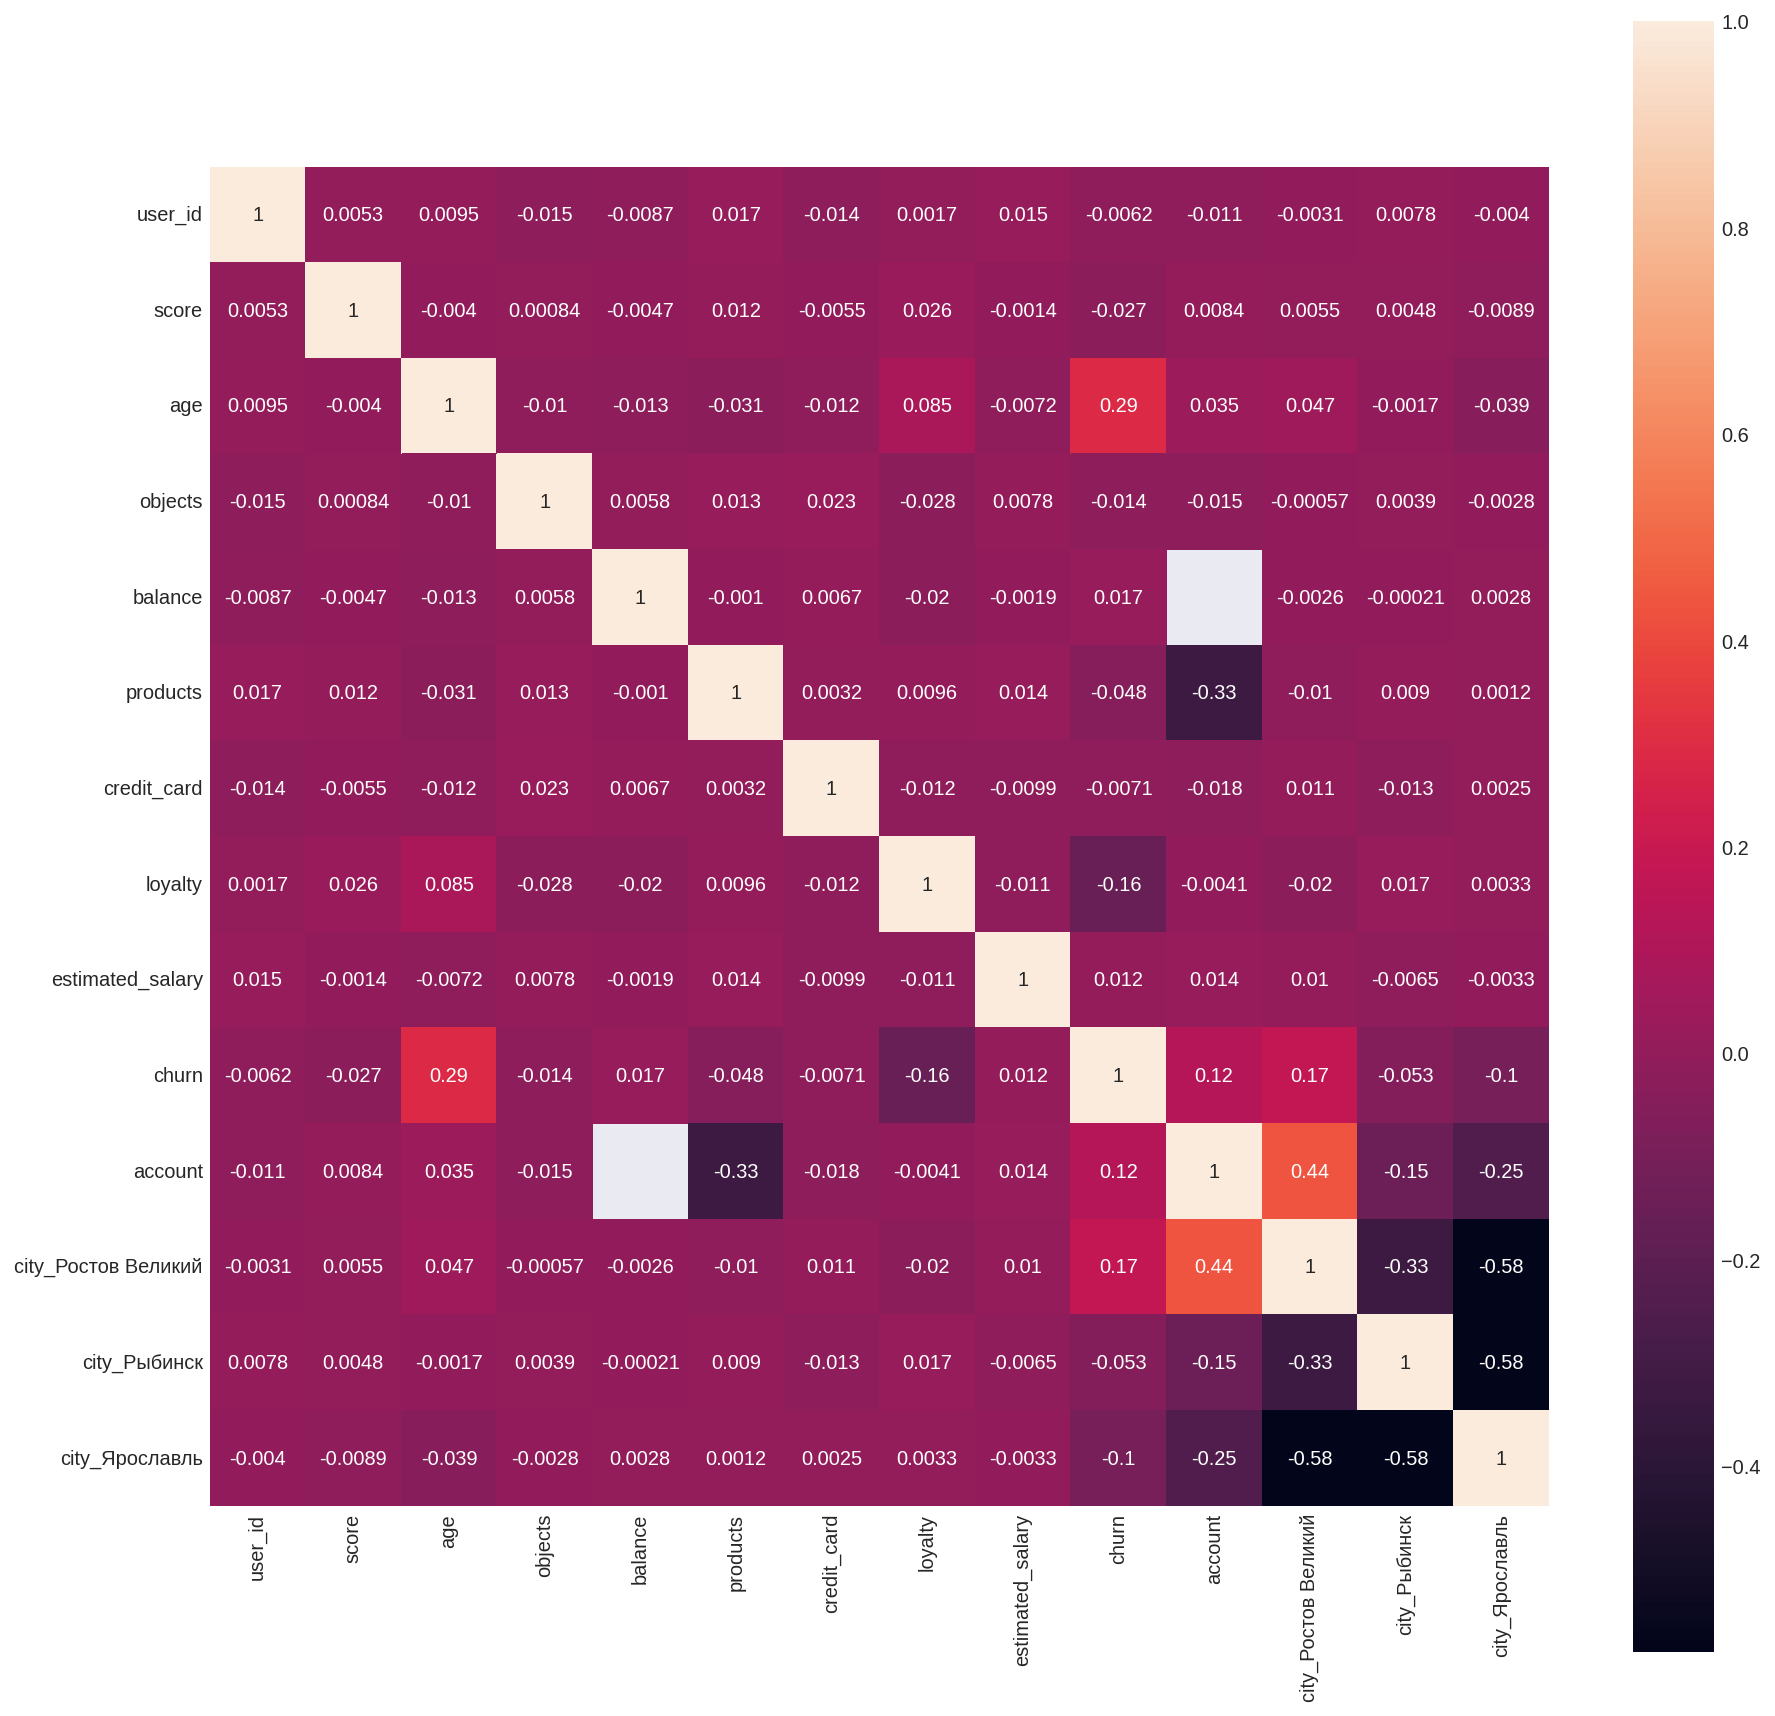

In [26]:
cm = df_categorization[['user_id', 'score', 'age', 'objects', 'balance', 'products',
       'credit_card', 'loyalty', 'estimated_salary', 'churn', 'account', 'city_Ростов Великий',
       'city_Рыбинск', 'city_Ярославль']].corr()
fig = plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, square=True)
plt.show()

Согласно полученной матрице:

* На отток большее влияние оказывает возраст, корреляция слабая и составляет 0,29. 
* Между оттоком и городами чуть выше связь у Ростова, но и она очень слабая и равна 0,17.
* Есть небольшая взаимосвязь между наличием счета и Ростовом, корреляция 0,44.
* Между количеством продуктов и наличием счета слабая отрицательная корреляция 0,33.

Построим сводную таблицу и посмотрим на процент ушедших клиентов в зависимости от количества продуктов:

In [27]:
outflow_product = df.groupby(['products']).agg({'churn':['count', lambda x: '{:.2%} '.format(x.mean())]})
outflow_product.columns = ['count', 'outflow']
outflow_product['percent'] = outflow_product['count']/len(df)
outflow_product.reindex(columns=['count', 'percent', 'outflow']).style.format({'percent':'{:,.2%}'.format,})

,count,percent,outflow
products,,,
1,5084,50.84%,27.71%
2,4590,45.90%,7.58%
3,266,2.66%,82.71%
4,60,0.60%,100.00%


In [28]:
fig = go.Figure(go.Pie(labels=outflow_product.index, values=outflow_product['percent']))
fig.update_layout(width=700, height=500, title="Соотношение клиентов по количеству продуктов")
fig.show()

Так как выборки у клиентов с 3 и 4 продуктами очень маленькие и для обоих характерна крайне высокая доля оттока, то объединим их в одну группу:

In [29]:
def group_products(number_products):
    if number_products == 4:
        return 3
    return number_products

Создадим для этого столбец 'products_group' в таблице df:

In [30]:
df['products_group'] = df['products'].apply(group_products)

Проверим, что значения распределились корректно:

In [31]:
df[['products','products_group']].head(10)

,products,products_group
0,1,1
1,1,1
2,3,3
3,2,2
4,1,1
5,2,2
6,2,2
7,4,3
8,2,2
9,1,1


Распределение верное. Выделим таблицы в зависимости от числа продуктов:

In [32]:
df_product_one = df.query('products == 1')
df_products_two = df.query('products == 2')
df_products_several = df.query('products >= 3')

<a name="3.1"><h3>3.1 Соотношение клиентов по возрастным группам</h3></a>

Напишем функцию, которая возвращает сводную таблицу с данными о количестве и доле пользователей, а также о количестве и доле ушедших по возрастным группам в зависимости от числа продуктов:

In [33]:
def pivot(data, column):
    table = data.groupby(column).agg({
    'churn':['count', lambda x: x.count()/data['user_id'].count()* 100,'sum', lambda x: x.mean()*100]})
    table.columns = ['count', 'users_%', 'number_in_churn', 'churn_%']
    return table

Обратимся к функции и выведем таблицу с пользователями 1 продукта:

In [34]:
age_product_one = pivot(df_product_one, 'age_groups')
age_product_one

,count,users_%,number_in_churn,churn_%
age_groups,,,,
молодой возраст,1982,38.99,244,12.31
пожилой возраст,285,5.61,99,34.74
средний возраст,2817,55.41,1066,37.84


Наибольшая возрастная группа среди клиентов среднего возраста - 55.41%, молодых клиентов 38.99%, доля пожилых - 5,61%. Наименьший отток у молодых клиентов.

Выведем таблицу с пользователями 2 продуктов:

In [35]:
age_products_two = pivot(df_products_two, 'age_groups')
age_products_two

,count,users_%,number_in_churn,churn_%
age_groups,,,,
молодой возраст,2103,45.82,59,2.81
пожилой возраст,218,4.75,29,13.30
средний возраст,2269,49.43,260,11.46


Почти половина клиентов среднего возраста, молодых клиентов на 3,61% меньше, при этом чаще уходят клиенты пожилого возраста.

Выведем таблицу с пользователями, у которых 3 или 4 продукта:

In [36]:
age_products_several = pivot(df_products_several, 'age_groups')
age_products_several

,count,users_%,number_in_churn,churn_%
age_groups,,,,
молодой возраст,68,20.86,44,64.71
пожилой возраст,23,7.06,19,82.61
средний возраст,235,72.09,217,92.34


В данной группе по доле клиентов значительно выделяются клиенты среднего возраста, их доля составляет 72.09% и у них же максимальный отток 92.34%

Для более наглядного сравнения групп напишем функцию, которая будет строить круговые диаграммы: 

In [37]:
def pie(table_1, table_2, table_3, name_group):
    fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                subplot_titles=['','Соотношение пользователей по '+ str(name_group) +' в зависимости от числа продуктов'])
    fig.add_trace(go.Pie(labels=table_1.index, values=table_1['users_%'], title='1 продукт'), row=1, col=1)
    fig.add_trace(go.Pie(labels=table_2.index, values=table_2['users_%'], title='2 продукта'), row=1, col=2)
    fig.add_trace(go.Pie(labels=table_3.index, values=table_3['users_%'], title='3 и 4 продукта'), row=1, col=3)
    fig.show()

Применим функцию pie и выведем графики с долей пользователей по возрастным группам:

In [38]:
pie(age_product_one,age_products_two, age_products_several,'возрастным группам')

<a name="3.2"><h3>3.2 Cоотношение клиентов по городам</h3></a>

Посмотрим на количество и долю клиентов в зависимости от города:

In [39]:
city_product_one = pivot(df_product_one, 'city')
city_product_one

,count,users_%,number_in_churn,churn_%
city,,,,
Ростов Великий,1349,26.53,578,42.85
Рыбинск,1221,24.02,267,21.87
Ярославль,2514,49.45,564,22.43


Половина клиентов с 1 продуктом из Ярославля, в Ростове 26.53% клиентов, а в Рыбинске на 2.5% меньше клиентов. Чаще уходят клиенты из Ростова.

In [40]:
city_products_two = pivot(df_products_two, 'city')
city_products_two

,count,users_%,number_in_churn,churn_%
city,,,,
Ростов Великий,1040,22.66,126,12.12
Рыбинск,1183,25.77,87,7.35
Ярославль,2367,51.57,135,5.70


Клиентов с 2 продуктами в Ярославля чуть больше половины - 51.57% и наименьшая доля клиентов из Ростова - 22.66%. ТОже большая доля оттока в Ростове.

In [41]:
city_products_several = pivot(df_products_several, 'city')
city_products_several

,count,users_%,number_in_churn,churn_%
city,,,,
Ростов Великий,120,36.81,110,91.67
Рыбинск,73,22.39,59,80.82
Ярославль,133,40.80,111,83.46


Клиентов с 3 и 4 продуктами в Ярославе и Ростове почти поровну, в Ростове меньше всего на 4%. Отток в Ростове примерно на 10% выше, чем в других городах.

In [42]:
pie(city_product_one, city_products_two, city_products_several,'городам')

<a name="3.3"><h3>3.3 Соотношение клиентов по гендерным признакам</h3></a>

Выведем сводные таблицы с разделением по гендерному признаку:

In [43]:
gender_product_one = pivot(df_product_one, 'gender')
gender_product_one

,count,users_%,number_in_churn,churn_%
gender,,,,
Ж,2296,45.16,762,33.19
М,2788,54.84,647,23.21


Большинство пользователей 1 продукта клиенты мужского пола, их доля составляет 54.84%, доля ушедших у женщин больше на 10%.

In [44]:
gender_products_two = pivot(df_products_two, 'gender')
gender_products_two

,count,users_%,number_in_churn,churn_%
gender,,,,
Ж,2060,44.88,210,10.19
М,2530,55.12,138,5.45


Для пользователей 2 продуктов соотношение такое же.

In [45]:
gender_products_several = pivot(df_product_one, 'gender')
gender_products_several

,count,users_%,number_in_churn,churn_%
gender,,,,
Ж,2296,45.16,762,33.19
М,2788,54.84,647,23.21


Можно сделать вывод, что по полу разницы в группах нет. Отобразим полученные выводы на графиках:

In [46]:
pie(gender_product_one, gender_products_two, gender_products_several, 'полу')

<a name="3.4"><h3>3.4 Различие по числу продуктов по остальным признакам</h3></a>

Создадим сводную таблицу, сгруппированную по числу продуктов, с данными по признакам 'credit_card', 'loyalty', 'account',  'objects', 'balance', 'score' и 'estimated_salary':

In [47]:
pivot_products = df.groupby(['products_group'])[['credit_card','loyalty','account', 'objects', 'balance', 'score', 'estimated_salary']].agg({
    'credit_card': lambda x: x.mean()*100,
    'loyalty': lambda x: x.mean()*100,
    'account' : lambda x: x.mean()*100,
    'objects': 'median',
    'balance': 'median',
    'score': 'median',
    'estimated_salary' : 'median'}).round(2)
pivot_products.columns = ['credit_card_%', 'loyalty_%', 'account_%', 'objects','balance', 'score', 'estimated_salary']
pivot_products

,credit_card_%,loyalty_%,account_%,objects,balance,score,estimated_salary
products_group,,,,,,,
1,70.38,50.41,82.20,5.00,119919.12,651.00,99226.83
2,70.72,53.29,43.36,5.00,119762.24,653.00,100738.86
3,70.86,43.56,65.64,5.00,120003.28,650.00,103874.67


* По наличию кредитных карт группы практически не отличаются.
* Большее число активных клиентов с 2 продуктами, клиентов с 3 или более продуктами примерно на 10% меньше.
* Группа с 2 продуктами имеет наименьшее число пользователей, у которых открыт счет в банке, их доля равна 43.36%, самая большая доля пользователей со счетом в банке у пользователей 1 продукта - 82.2%.
* У всех клиентов медиана по количеству объектов равна 5, баланс на счете, средний бал  и предполагаемая зарплата отличается незначительно. Для таких признаков следует рассмотреть, есть ли отличия в распределении данных.

Так как в таблице значения разного типа, то разделим графики в зависимости от вида.

Построим график с информацией о доле клиентов с кредитными картами, доле клиентов, которые были активны и имели счет:

In [48]:
fig = go.Figure(data=[
go.Bar(name='Доля клиентов, имеющих кредитные карты', x=pivot_products.index, text=pivot_products['credit_card_%'], y=pivot_products['credit_card_%']),
go.Bar(name='Доля активных клиентов', x=pivot_products.index, text=pivot_products['loyalty_%'], y=pivot_products['loyalty_%']),
go.Bar(name='Доля клиентов, имеющих счёт', x=pivot_products.index, text=pivot_products['account_%'], y=pivot_products['account_%'])
])
fig.update_layout(xaxis_title='products_group', yaxis_title="percentage", title='Сравнение признаков в зависимости от числа продуктов ')
fig.show()

Построим графики вида boxplot с распределением данных по признакам 'score', 'objects', 'balance' и'estimated_salary':

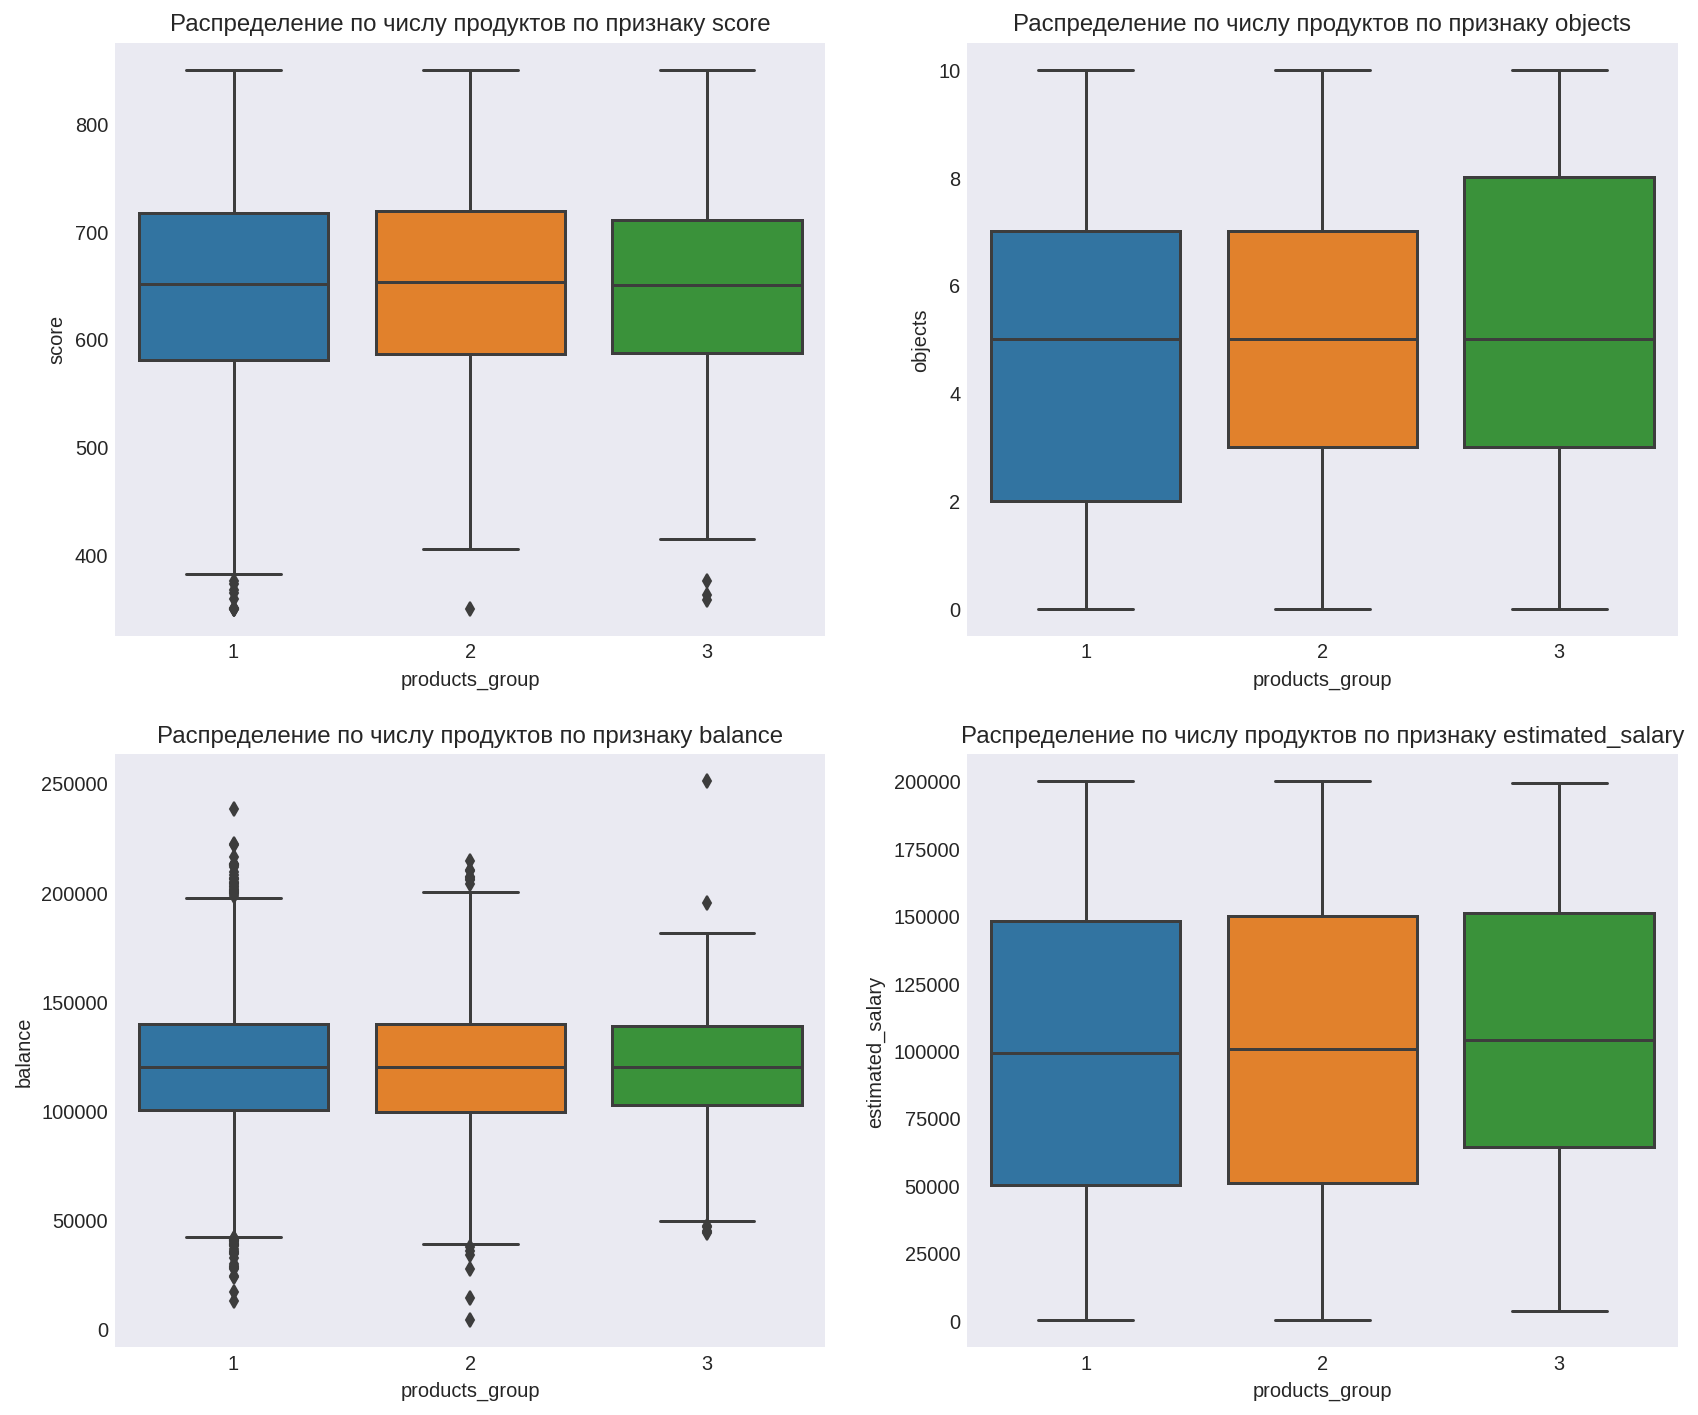

In [49]:
plt.figure(figsize=(14, 12))
i = 1
for column in ['score','objects','balance','estimated_salary']:
    plt.subplot(2, 2, i)
    sns.boxplot(x=df["products_group"], y=column, data = df).set_title('Распределение по числу продуктов по признаку '+ str(column))
    i += 1
plt.show()

* По распределению баллов крединого скоринга группы почти не отличаются, только у клиентов с 1 продуктом чуть больше выбросов с оценками менее 400 баллов.
* По числу объектов у половины клиентов с одним продуктом от 2 до 7 объектов в собственности, с 2 продуктами от 3 до 7 и у клиентов с большим числом продуктом от 3 до 8 объектов.
* По остатку на счете межквартильный размах тоже практически одинаковый, у клиентов с тремя и четырьмя продуктами немного уже разброс по остатку на счете, а у клиентов с 1 продуктом немного чаще встречается баланс меньше 5 тысяч и больше 200 тысяч.
* Распределение по предполагаемой зарплате клиентов с 1 и 2 продуктами одинаковое и немного шире, чем у клиентов с большим числом продуктов.

<a name="3.5"><h3>3.5 Описание сегментов</h3></a>

Так как не было выявлено существенных различий между числом продуктов и признаками  'gender','credit_card', 'score', 'objects', 'balance' и 'estimated_salary', то не будем учитывать эти параметры при описании характеристик пользователей.

Выделим отличительные характерные черты для каждого сегмента:

1 сегмент с одним продуктом:
 * Больше половины пользователей среднего возраста (55%), молодых клиентов 39%;
 * По оттоку большинство ушедших клиенты среднего (37%,84) и пожилого возраста (34.74%), общая доля оттока 27.71%;
 * 49% клиентов из Ярославля, в других городах клиентов почти равное количество, в Ростове больше всего на 2.5%;
 * Половина клиентов активны и 82.2% клиентов имеют счет.


2 сегмент с двумя продуктами:
 * Примерно равное соотношение клиентов среднего и молодого возраста, но первых больше на 3,61%;
 * Самый маленький отток 7.58%, среди них чаще уходят пожилые клиенты (13.3%) и клиенты среднего возраста (11.5%);
 * Половина клиентов из Ярославля, в Рыбинске 25.8% и в Ростове 22% пользователей;
 * Активных клиентов 53.3%;
 * Самая меньшая доля по наличию счета в сравнении с пользователями из других сегментов - 43.4%.

3 сегмент с 3 или 4 продуктами:
 * Большинство клиентов среднего возраста (72.1%);
 * Самый большой отток, с тремя продуктами ушли 82.71% и c 4 все клиенты, общий процент по группе 85.89%.
 * Клиентов из Ярославля 40.8%, из Ростова 36.8% и меньшая доля клиентов из Рыбинска 22.4%;
 * Наименее активная группа с долей 43.6%;
 * Счет имеют 65.6% пользователей.

<div style="border: solid green 2px; padding: 20px">
    
**Выводы**
* Построена матрица корреляции, по которой определили, что есть слабая взаимосвязь 0.29% между оттоком и возрастом клиентов.
* Сравнили клиентов в зависимости от числа используемых продуктов по возрасту, городам и гендерным признакам. Во всех группах большинство клиентов среднего возраста, половина пользователей из Ярославля. По полу наибольшее количество клиентов мужчины, по всем продуктам равное соотношение примерно 55% к 45%.
* Рассмотрели доли клиентов в зависимости от активности пользователей, наличия кредитных карт и счета. Разницы по использованию кредитных карт нет, клиенты с 3 и 4 продуктами менее активные примерно на 10%, по наличию счета больше всего клиентов с 1 продуктом (82.2%).
* Посмотрели на распределение пользователей по баллам кредитного скоринга, балансу на счете, количеству объектов и предполагаемой заработной плате и установили, что разницы в данных практически нет. 
* В результате выделены и описаны 3 сегмента в зависимости от числа продуктов.</div>

<a name="4"><h2>4 Проверка статистических гипотез</h2></a>

<a name="4.1"><h3>4.1 Сравнение среднего дохода клиентов, пользующихся одним и двумя продуктами банка</h3></a>

Сформулируем нулевую и альтернативную гипотезу:

* H₀: средний доход клиентов c 1 продуктом равен доходу клиентов с 2 продуктами.
* H₁: средний доход клиентов c 1 продуктом не равен доходу клиентов с 2 продуктами.

Для сравнения гипотез о равенстве средних значений двух независимых совокупностей воспользуемся методом scipy.stats.ttest_ind(). Перед проверкой гипотезы посмотрим размах выборки, средний доход по продуктам и дисперсию:

In [50]:
revenue_products = df.query('products < 3').groupby(['products'])['estimated_salary'].agg(
    ['count', 'mean', lambda x: round(np.var(x, ddof=1))])
revenue_products.columns = ['count', 'mean', 'variance']
revenue_products

,count,mean,variance
products,,,
1,5084,99487.26,3290585635
2,4590,100452.01,3339776563


Дисперсии не равны, поэтому при проверке гипотез укажем в методе equal_var = False.

Так как в работе будет проверяться еще одна гипотеза со сравнением среднего дохода, то напишем функцию:

In [51]:
def hypothesis_testing(data_1, data_2, bool_type):
    table_one = data_1['estimated_salary']
    table_two = data_2['estimated_salary']

    alpha = .05

    results = st.ttest_ind(
        table_one, 
        table_two,
        equal_var = bool_type)

    print('p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

Проверим гипотезу:

In [52]:
hypothesis_testing(df_product_one, df_products_two, False)

p-значение: 0.4106493940071987
Не получилось отвергнуть нулевую гипотезу


<div style="border: solid green 2px; padding: 20px">
    
**Вывод**
    
При условии, что нулевая гипотеза верна, вероятность встретить клиентов с одинаковым доходом 41%, поэтому не отвергаем гипотезу о равенстве доходов клиентов с 1 и 2 продуктами.</div>

<a name="4.2"><h3>4.2 Сравнение среднего дохода клиентов в Ярославле и области</h3></a>

Сформулируем нулевую и альтернативную гипотезу:

* H₀: средний доход клиентов в Ярославле равен доходу клиентов из регионов.
* H₁: средний доход клиентов в Ярославле не равен доходу клиентов из регионов.

Добавим в таблицу столбец 'locality_yaroslavl' типа bool для разделения клиентов из Ярославля и области:

In [53]:
df['locality_yaroslavl'] = df['city'] == 'Ярославль'

Посмотрим размах выборки, средний доход по продуктам и дисперсию:

In [54]:
pivot_revenue = df.groupby('locality_yaroslavl')['estimated_salary'].agg(['count', 'mean', lambda x: round(np.var(x, ddof=1))])
pivot_revenue.columns = ['count', 'mean', 'variance']
pivot_revenue

,count,mean,variance
locality_yaroslavl,,,
False,4986,100282.37,3328165749
True,5014,99899.18,3287450038


Размер выборок практически равен, сумма дохода отличается совсем незначительно, дисперсии не равны.

Проверим гипотезы:

In [55]:
hypothesis_testing(df.query('locality_yaroslavl == True'), df.query('locality_yaroslavl == False'), False)

p-значение: 0.7390454252259295
Не получилось отвергнуть нулевую гипотезу


<div style="border: solid green 2px; padding: 20px">
    
**Вывод**
    
Значение p-value 74%, значит вероятность встретить клиентов с равной средней зарплатой высокая, поэтому не отвергаем нулевую гипотезу о равенстве доходов клиентов в Ярославле и области.</div>

<a name="5"><h2>5 Общие выводы и рекомендации по удержанию для каждого сегмента</h2></a>

В результате работы рассмотрели различные признаки пользователей в зависимости от количества используемых продуктов и выделили 3 сегмента.

По оттоку клиентов сделаны следующие выводы:
* 1 сегмент занимает 2 место по доле ушедших, которая равна 27.71%;
* Наиболее надёжный 2 сегмент, в нём доля оттока составляет 7.58%;
* Очень высокий отток у клиентов с 3 продуктами - 82.71%, с 4 продуктами ушли все клиенты, поэтому рекомендуется для удержания клиентов 3 сегмента не предлагать дополнительные продукты, а рассмотреть сначала причины такого большого оттока. Возможно использование более 2 продуктов становится неудобным или крайне невыгодным;
* Большинство ушедших по всем сегментам - клиенты среднего возраста, почти также часто уходят клиенты пожилого возраста и реже всего молодые клиенты, в первом сегменте у молодых отток 12.3%, во втором 2.8% и в третьем 64.7%;
* Также независимо от числа продуктов чаще уходят клиенты женского пола, для 1 и 3 сегмента разница на 10% и для 2 сегмента на 5%;
* Большинство ушедших из Ростова Великого. В первом сегменте отток составил 42.9%, во втором 12.1% и в 3 сегменте 91.7%.

По признаку 'loyalty' большинство активных во 2 сегменте - 53.3%, чуть меньше активных клиентов в 1 сегменте - 50.4% и меньше всего активных пользователей в 3 сегменте - 43.6%. Так как в 3 сегменте большая доля ушедших, то возможно активность пользователей снижается при оттоке клиентов, хотя во втором сегменте, где ушедших меньше, доля активности на 3% ниже, чем в первой группе.

По наличию счета лидирует клиенты из 1 сегмента с долей 82.2%, во втором 43.4% и в третьем сегменте открыт счёт у 65.6% клиентов. Так как вторая группа самая устойчивая, то нельзя сказать, что наличие счета положительно влияет на удержание клиентов. При этом не видно отрицательного влияния, так как первый сегмент значительно надежнее третьего, у которого на 16,6% меньше клиентов с открытым счётом.

Разницы в признаках 'credit_card', 'score', 'objects', 'balance' и 'estimated_salary' по числу продуктов обнаружено не было:
* Примерно 70% клиентов в каждой группе имеют кредитные карты;
* В среднем балл кредитного скоринга равен 650;
* Половина клиентов имеет в собственности по 5 объектов;
* У клиентов со счетом средний остаток примерно 119 тысяч;
* Примерная предполагаемая зарплата 100 тысяч.

В 1 и 2 сегменте большая часть клиентов среднего возраста (55% и 50% по группам соответственно), при этом достаточно много клиентов молодого возраста (39% и 45.8%) и совсем мало клиентов пенсионного возраста (5.6% и 4.8%). Так как в данных сегментах соотношение клиентов по возрастным группам отличается незначительно, то для них рекомендуется предлагать продукты исходя из возрастных групп, а для 3 сегмента проработать условия использования существующих продуктов и сделать более выгодные и удобные предложения.

Рекомендации по возрастным группам:
* Для молодых клиентов можно предложить конкурентоспособные условия по выдаче кредита на образование, карты для путешественников, кэшбэк за покупки при заказе товаров, при оплате в кафе и ресторанах, а также при оплате транспорта.
* Так как большинство клиентов среднего возраста имеют детей, то для них могут быть интересны предложения с кэшбеком при оплате детских товаров, путевок в лагерь, при оплате театров и концертов, повышенный кэшбек для многодетных семей, а также страхование детей и страхование в путешествиях;
* Для удержания пенсионеров рекомендуется предлагать перевести пенсию с выгодным/конкурентным процентом по накопительному счету, бесплатное страхование от мошенничества и выдачу кредита наличными;
* Так как в среднем у клиентов большое число объектов в собственности, около 5, то все возрастные группы могут быть заинтересованы в страховании имущества.

Также в работе были проверены две гипотезы, в результате установили, что:
* Нельзя отвергнуть гипотезу о равенстве среднего доходов клиентов с 1 и 2 продуктами;
* Нельзя отвергнуть гипотезу о равенстве среднего дохода клиентов из Ярославля и регионов.